In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import progressbar
import random
import seaborn as sns
import time

import Simulation

from IPython.display import clear_output
from Diffusion.Model       import *
from Algorithms.Baselines  import *
from Algorithms.Heuristics import *
from Algorithms.LAIM       import *
from Algorithms.Proposed   import *

sns.set_style("darkgrid")

In [2]:
algorithms = [fast_LAIM_solution, LAIM_solution, random_solution, degree_solution, opinion_degree_solution]
n_trials   = 10
seed_sizes = list(range(0, 100+1, 10))
seed_sizes[0] = 1
time_horizon = 100
topo_code = "eu-core" #"amazon"

columns = ["trial", "opinion", "activated", "algorithm", "seed_size", "alg-runtime"]
data = {col: [] for col in columns}
random_seed = 16785407

uniform = random.random

# Initial Observations & To-Do's
* The TIM+ algorithm is not _correctly_ implemented. Currently, it takes far too long to run on the EU-Core topology. **Investigate this.**
* The `LAIM_solution` algorithm is _really_ slow relative to other solutions. Instead, just use `fast_LAIM_solution`.

In [3]:
data = pd.DataFrame()
for solution in algorithms:
    results = Simulation.run(
        topo_code=topo_code, 
        algorithm=solution, 
        seed_sizes=seed_sizes, 
        time_horizon=time_horizon, 
        n_trials=n_trials, 
        ffm_distr_func=uniform,
        opinion_distr_func=uniform,
        random_seed=None,
        use_communities=False,
        out_dir=None
    )
    data = data.append(results)

ial (1/10):  18%|█▊        | 20/110 [00:13<01:21,  1.10it/s]



opinion_degree_solution, K = 20, Trial (1/10):  19%|█▉        | 21/110 [00:13<01:30,  1.02s/it]



opinion_degree_solution, K = 20, Trial (2/10):  19%|█▉        | 21/110 [00:15<01:30,  1.02s/it]



opinion_degree_solution, K = 20, Trial (2/10):  20%|██        | 22/110 [00:15<01:47,  1.22s/it]



opinion_degree_solution, K = 20, Trial (3/10):  20%|██        | 22/110 [00:16<01:47,  1.22s/it]



opinion_degree_solution, K = 20, Trial (3/10):  21%|██        | 23/110 [00:16<01:53,  1.31s/it]



opinion_degree_solution, K = 20, Trial (4/10):  21%|██        | 23/110 [00:18<01:53,  1.31s/it]



opinion_degree_solution, K = 20, Trial (4/10):  22%|██▏       | 24/110 [00:18<01:59,  1.39s/it]



opinion_degree_solution, K = 20, Trial (5/10):  22%|██▏       | 24/110 [00:20<01:59,  1.39s/it]



opinion_degree_solution, K = 20, Trial (5/10):  23%|██▎       | 25/110 [00:20<01:59,  1.41s/it]



opinion_degree_solution, K = 20, Trial (6/10)

In [4]:
data.head()

,trial,opinion,activated,algorithm,seed_size,algorithm_time
0,0,522.930066,19,fast_LAIM_solution,1,0.818058
1,1,512.908859,11,fast_LAIM_solution,1,0.814101
2,2,516.523608,17,fast_LAIM_solution,1,0.801568
3,3,504.635849,10,fast_LAIM_solution,1,0.800616
4,4,507.261681,22,fast_LAIM_solution,1,0.801738


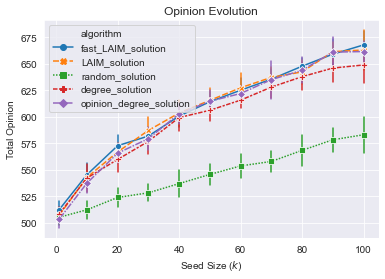

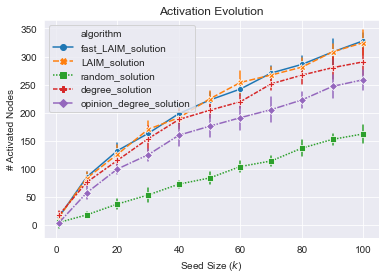

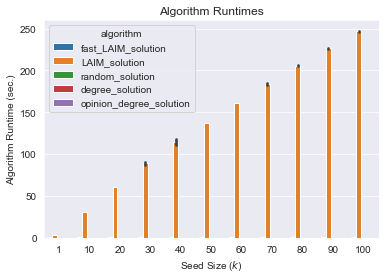

In [24]:
sns.lineplot(x="seed_size", y="opinion", style="algorithm", hue="algorithm", err_style="bars", ci="sd", markers=True, data=data)
plt.title("Opinion Evolution")
plt.xlabel("Seed Size ($k$)"); plt.ylabel("Total Opinion");
plt.show()
sns.lineplot(x="seed_size", y="activated", style="algorithm", hue="algorithm", err_style="bars", ci="sd", markers=True, data=data)
plt.title("Activation Evolution")
plt.xlabel("Seed Size ($k$)"); plt.ylabel("# Activated Nodes");
plt.show()
sns.barplot(x="seed_size", y="algorithm_time", hue="algorithm", ci="sd", data=data)
plt.title("Algorithm Runtimes")
plt.xlabel("Seed Size ($k$)"); plt.ylabel("Algorithm Runtime (sec.)");
plt.show()

In [16]:
data.to_csv("../out/experiment_data_2020-08-19.csv")

In [22]:
data[["opinion", "activated", "algorithm", "algorithm_time"]].groupby("algorithm").mean()

,opinion,activated,algorithm_time
algorithm,,,
LAIM_solution,604.881911,203.936364,132.589780
degree_solution,597.118723,187.500000,0.002574
fast_LAIM_solution,605.593780,204.572727,0.811359
opinion_degree_solution,602.385046,158.690909,0.182961
random_solution,544.891321,85.181818,0.000118
